# Vector Arithmetics
> operations on vectors and their *geometrical* meaning

## Vector Addition

Given two vectors $ v_{1} = (v1_{x}, v1_{y}) $ and $ v_{2} = (v2_{x}, v2_{y}) $:

$$ v_{1} + v_{2} = (v1_{x} + v2_{x}, v1_{y} + v2_{y}) $$

Thus, we can define a function that performs the sum of two vectors as:

In [3]:
def add(v1, v2):
    return (v1[0] + v2[0], v1[1] + v2[1])

v1 = (4, 3)
v2 = (-1, 1)
v = add(v1, v2)
print(v)

(3, 4)


Let's visualize it:

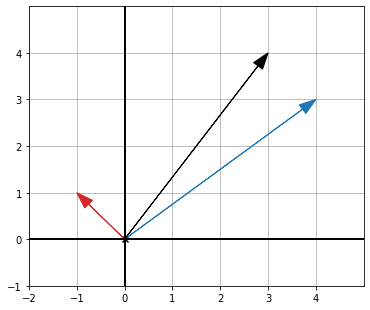

In [6]:
from vector_drawing import draw, Arrow, blue, black, red

draw(Arrow(v1, color=blue), Arrow(v2, color=red), Arrow(v, color=black))

If we look closely, we see that the *black* vector is the result of making the tip of the *blue* vector move the distance and direction of the *red* vector.

This can be more easily understood if we draw the *red* vector at the tip of the *blue* one:

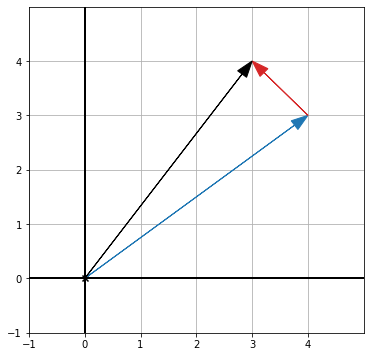

In [7]:
draw(Arrow(v1, color=blue), Arrow(v, v1, color=red), Arrow(v, color=black))

This is known in geometry as a **translation**.

We can apply a translation to our good old dino, by adding a certain vector to each of its points:

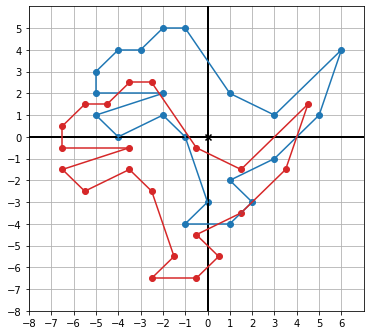

In [10]:
dino_points = [(6, 4), (3, 1), (1, 2), (-1, 5), (-2, 5), (-3, 4), (-4, 4), (-5, 3), (-5, 2), (-2, 2), (-5, 1), (-4, 0), (-2, 1), (-1, 0),
                        (0, -3), (-1, -4), (1, -4), (2, -3), (1, -2), (3, -1), (5, 1)]

translated_dino_points = [add((-1.5, -2.5), p) for p in dino_points]

from vector_drawing import Points, Polygon

draw(
  Points(*dino_points, color=blue),
  Polygon(*dino_points, color=blue),
  Points(*translated_dino_points, color=red),
  Polygon(*translated_dino_points, color=red)
)

The translation can be easily seen by explictly drawing the vectors.

First using an *old-school* approach:

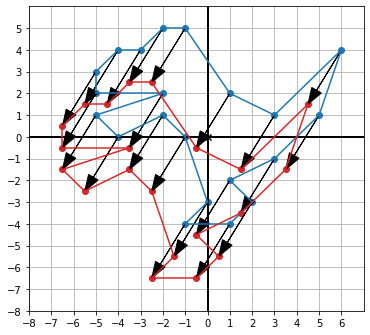

In [11]:
arrows = []
for i in range(0, len(dino_points)):
  arrows.append(Arrow(translated_dino_points[i], dino_points[i], color=black))

draw(
  Points(*dino_points, color=blue),
  Polygon(*dino_points, color=blue),
  Points(*translated_dino_points, color=red),
  Polygon(*translated_dino_points, color=red),
  *arrows
)

And now much cleaner implementation with the same result using `zip()`:

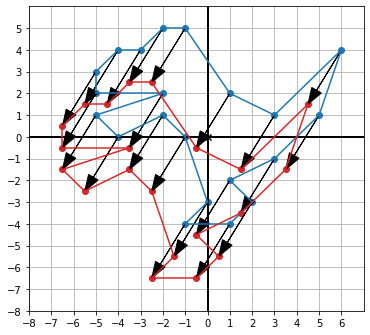

In [12]:
arrows = [Arrow(z[0], z[1], color=black) for z in zip(translated_dino_points, dino_points)]
draw(
  Points(*dino_points, color=blue),
  Polygon(*dino_points, color=blue),
  Points(*translated_dino_points, color=red),
  Polygon(*translated_dino_points, color=red),
  *arrows
)

## Vector Components and Length of a Vector

Many times it's useful to decompose a vector as a sum of other *simpler* vectors. This also happens is real-life situations: it's more natural when using directions to say "go 4 blocks east, then 3 blocks north" than "go 800 meters northeast".

One of the simplest way to decompose a vector is using the base $$ {(1, 0), (0, 1)} $$. That is, for example:

$ (4, 3) = (4, 0) + (0, 3) $

These are typically called the *x* and *y* components of the vector.

The **length of the vector** is the length of the arrow that represents it, that is, the length is the distance from the origin of the plane to the point that represents it.

That can be easily calculated if we recall the *Pythagorean Theorem*:
> For a right triangle (a triangle having two sides meeting at a 90° angle), the square of the length of the longest side (hypotenuse) is the sum of the squares of the lengths of the other two sides.

$ a^{2} = b^{2} + c^{2} $

Using the *x* and *y* components of a vector, and the *tip-to-tail* property of the vector addition makes it really easy to compute the length of a vector:

$ length(v) = \sqrt{b^{2} + c^{2}} $

In [15]:
from math import sqrt

def length(v):
    return sqrt(v[0]**2 + v[1]**2)

print(length((4, 3)))

5.0
